In [1]:

!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 9.5 MB/s eta 0:00:00


In [2]:

import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [3]:
import ultralytics
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 198MB/s]


In [6]:
results=model.predict(source="fruits.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/fruits.jpg: 480x640 1 apple, 15 oranges, 1335.7ms
Speed: 23.2ms preprocess, 1335.7ms inference, 34.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


In [7]:
result = results[0]
box = result.boxes[0]

In [8]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: orange
Coordinates: [448, 149, 656, 353]
Probability: 0.95
---
Object type: orange
Coordinates: [1110, 165, 1319, 375]
Probability: 0.94
---
Object type: orange
Coordinates: [757, 286, 951, 479]
Probability: 0.94
---
Object type: orange
Coordinates: [328, 330, 516, 524]
Probability: 0.92
---
Object type: orange
Coordinates: [878, 888, 1084, 1091]
Probability: 0.92
---
Object type: orange
Coordinates: [60, 396, 251, 566]
Probability: 0.89
---
Object type: orange
Coordinates: [1142, 463, 1276, 591]
Probability: 0.8
---
Object type: orange
Coordinates: [904, 117, 1059, 310]
Probability: 0.75
---
Object type: orange
Coordinates: [457, 534, 596, 635]
Probability: 0.63
---
Object type: orange
Coordinates: [218, 968, 281, 1040]
Probability: 0.42
---
Object type: orange
Coordinates: [890, 1082, 966, 1124]
Probability: 0.35
---
Object type: orange
Coordinates: [280, 1062, 348, 1125]
Probability: 0.33
---
Object type: orange
Coordinates: [814, 769, 932, 839]
Probability: 0.3
---
Obj

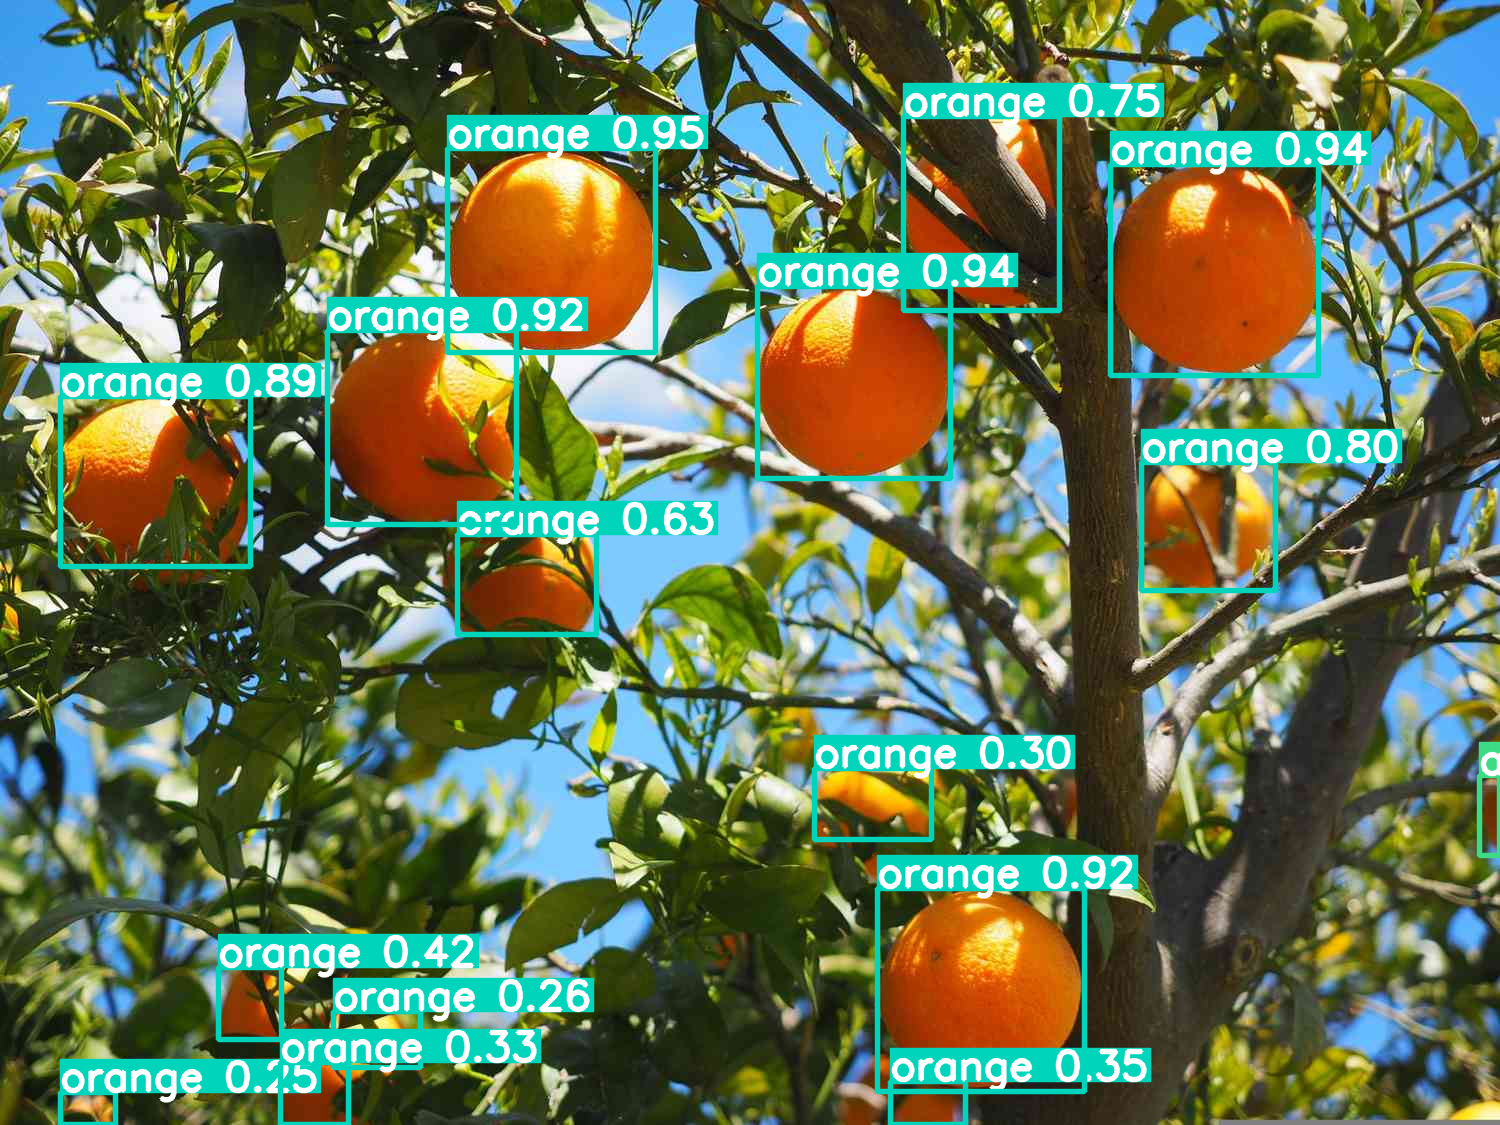

In [11]:
# Plotting results
from PIL import Image
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))
